# Pandas extended introduction

This notebook offers a more comprehensive overview of Pandas.  Note that it references a set of exercises that may be found in this repository, [here](./pandas-extended-intro-additional-exercises.ipynb).


# Section 1: Getting Started With Pandas

We will begin by introducing the `Series`, `DataFrame`, and `Index` classes, which are the basic building blocks of the pandas library, and showing how to work with them. By the end of this section, you will be able to create DataFrames and perform operations on them to inspect and filter the data.

## Anatomy of a DataFrame

A **DataFrame** is composed of one or more **Series**. The names of the **Series** form the column names, and the row labels form the **Index**.

In [ ]:
import pandas as pd

meteorites = pd.read_csv('./data/Meteorite_Landings.csv', nrows=5)
meteorites

*Source: [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh)*

#### Series:

In [ ]:
meteorites.name

#### Columns:

In [ ]:
meteorites.columns

#### Index:

In [ ]:

meteorites.index

## Creating DataFrames

We can create DataFrames from a variety of sources such as other Python objects, flat files, webscraping, and API requests. Here, we will see just a couple of examples, but be sure to check out [this page](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) in the documentation for a complete list.

### Using a flat file

In [ ]:
import pandas as pd

meteorites = pd.read_csv('data/Meteorite_Landings.csv')

*Tip: There are many parameters to this function to handle some initial processing while reading in the file &ndash; be sure check out the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).*

### Using data from an API

Collect the data from [NASA's Open Data Portal](https://data.nasa.gov/Space-Science/Meteorite-Landings/gh4g-9sfh) using the Socrata Open Data API (SODA) with the `requests` library:

In [ ]:
import requests

response = requests.get(
    'https://data.nasa.gov/resource/gh4g-9sfh.json',
    params={'$limit': 50_000}
)

if response.ok:
    payload = response.json()
else:
    print(f'Request was not successful and returned code: {response.status_code}.')
    payload = None

Create the DataFrame with the resulting payload:

In [ ]:
import pandas as pd

df = pd.DataFrame(payload)
df.head(3)

*Tip: `df.to_csv('data.csv')` writes this data to a new file called `data.csv`.*

In [ ]:
df.to_csv('mydata.csv')

## Inspecting the data
Now that we have some data, we need to perform an initial inspection of it. This gives us information on what the data looks like, how many rows/columns there are, and how much data we have.

Let's inspect the `meteorites` data.

#### How many rows and columns are there?

In [ ]:
meteorites.shape

#### What are the column names?

In [ ]:

meteorites.columns

#### What type of data does each column currently hold?

In [ ]:

meteorites.dtypes

#### What does the data look like?

In [ ]:
meteorites.head()

Sometimes there may be extraneous data at the end of the file, so checking the bottom few rows is also important:

In [ ]:
meteorites.tail()

#### Get some information about the DataFrame

In [ ]:
meteorites.info()

## Extracting subsets

A crucial part of working with DataFrames is extracting subsets of the data: finding rows that meet a certain set of criteria, isolating columns/rows of interest, etc. After narrowing down our data, we are closer to discovering insights. This section will be the backbone of many analysis tasks.

#### Selecting columns

We can select columns as attributes if their names would be valid Python variables:

In [ ]:
meteorites.name

If they aren't, we have to select them as keys. However, we can select multiple columns at once this way:

In [ ]:
meteorites[['name','mass (g)']]

#### Selecting rows

In [ ]:
meteorites[100:104]

#### Indexing

We use `iloc[]` to select rows and columns by their position:

In [ ]:
meteorites.iloc[100:104,[0,3,4,6]]

We use `loc[]` to select by name:

In [ ]:
meteorites.loc[100:104,'mass (g)':'year']

#### Filtering with Boolean masks

A **Boolean mask** is a array-like structure of Boolean values &ndash; it's a way to specify which rows/columns we want to select (`True`) and which we don't (`False`).

Here's an example of a Boolean mask for meteorites weighing more than 50 grams that were found on Earth (i.e., they were not observed falling):

In [ ]:
(meteorites['mass (g)'] > 50) & (meteorites.fall == "Found")

**Important**: Take note of the syntax here. We surround each condition with parentheses, and we use bitwise operators (`&`, `|`, `~`) instead of logical operators (`and`, `or`, `not`).

We can use a Boolean mask to select the subset of meteorites weighing more than 1 million grams (1,000 kilograms or roughly 2,205 pounds) that were observed falling:

In [ ]:
meteorites[(meteorites['mass (g)'] > 50) & (meteorites.fall == "Found")]

*Tip: Boolean masks can be used with `loc[]` and `iloc[]`.*

# Section 2: Data Visualization

The human brain excels at finding patterns in visual representations of the data; so in this section, we will learn how to visualize data using pandas along with the Matplotlib and Seaborn libraries for additional features. We will create a variety of visualizations that will help us better understand our data.

## Why is data visualization necessary?

So far, we have focused a lot on summarizing the data using statistics. However, summary statistics are not enough to understand the distribution &ndash; there are many possible distributions for a given set of summary statistics. Data visualization is necessary to truly understand the distribution:

<div style="text-align: center; margin-top: -10px;">
<img width="50%" src="https://raw.githubusercontent.com/stefmolin/data-morph/main/docs/_static/panda-to-star-eased.gif" alt="Data Morph: panda to star" style="min-width: 300px; margin-bottom: -10px;"/>
<div style="margin: auto; margin-top: 10px"><small><em>A set of points forming a panda can also form a star without any significant changes to the summary statistics displayed above. (source: <a href="https://github.com/stefmolin/data-morph">Data Morph</a>)</em></small></div>
</div>

## Plotting with pandas

Plotting in Pandas is usually done with matplotlib (see below) but many of these plotting functions can be called directly from Pandas. 

Once again, we will be working with the TSA traveler throughput data that we cleaned up in the previous section:

In [1]:
import pandas as pd

tsa_melted_holiday_travel = pd.read_csv(
    './data/tsa_melted_holiday_travel.csv',
    parse_dates=True, index_col='date'
)
tsa_melted_holiday_travel.head()

,year,travelers,holiday
date,,,
2019-01-01,2019,2126398.0,New Year's Day
2019-01-02,2019,2345103.0,New Year's Day
2019-01-03,2019,2202111.0,NaN
2019-01-04,2019,2150571.0,NaN
2019-01-05,2019,1975947.0,NaN


## Scatterplot 
One of the more convenient ways to get a quick overview of numeric data in Pandas is with a scatterplot matrix.

array([[<Axes: xlabel='year', ylabel='year'>,
        <Axes: xlabel='travelers', ylabel='year'>],
       [<Axes: xlabel='year', ylabel='travelers'>,
        <Axes: xlabel='travelers', ylabel='travelers'>]], dtype=object)

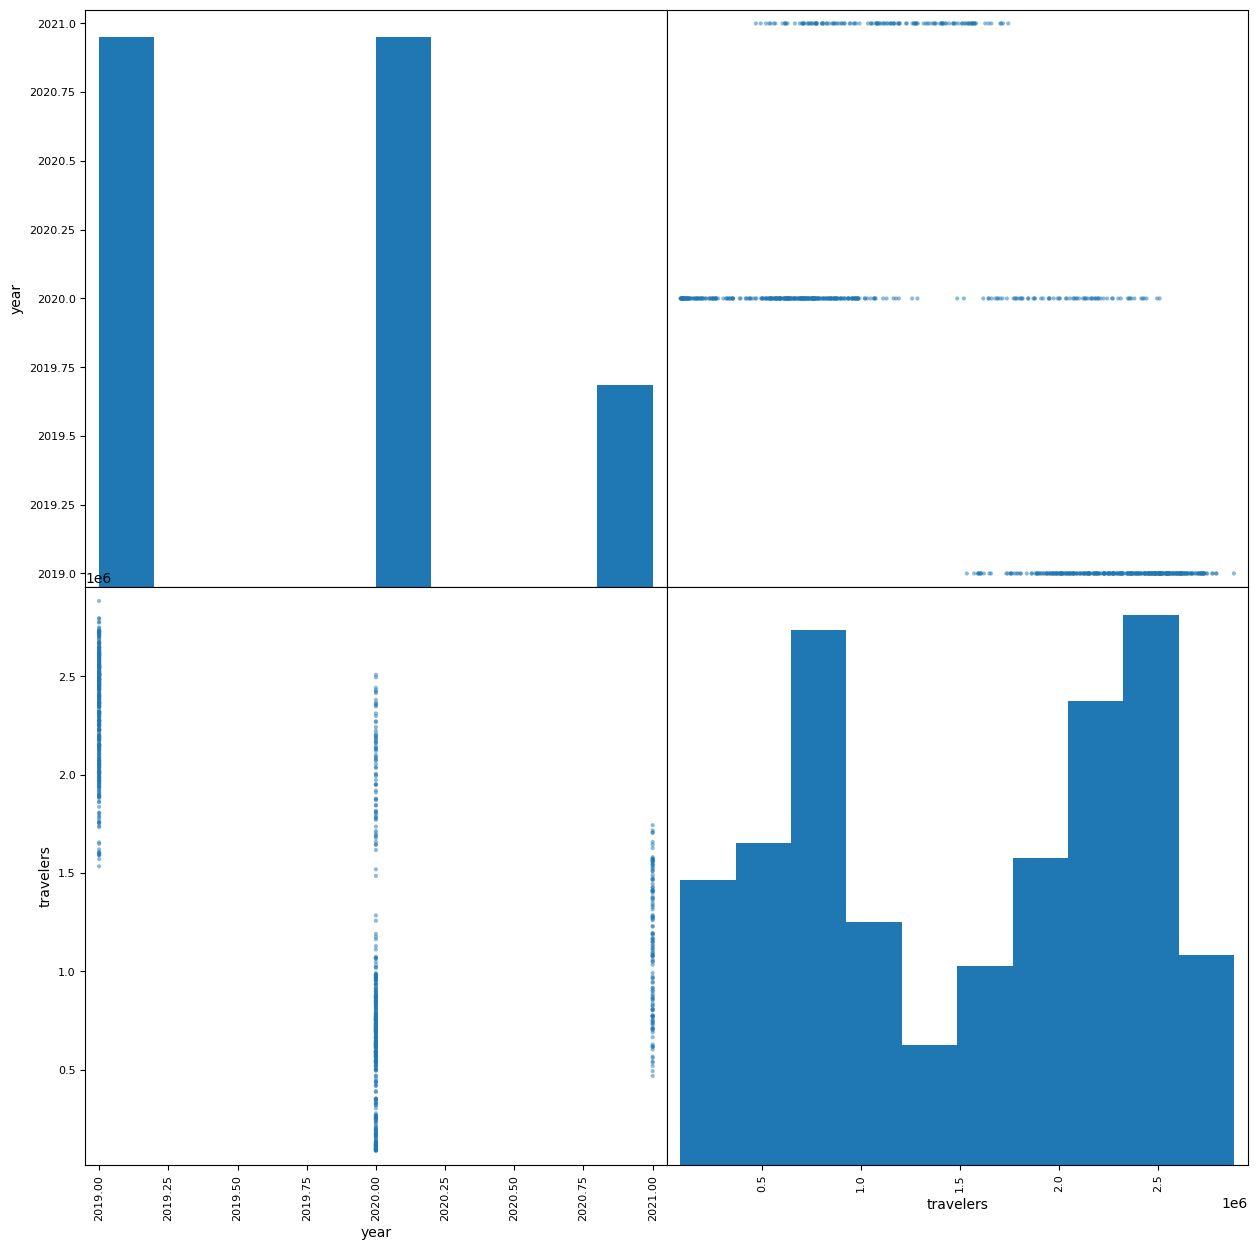

In [3]:
pd.plotting.scatter_matrix(tsa_melted_holiday_travel,figsize=(15,15))



We can create a variety of other visualizations using the `plot()` method. In this section, we will take a brief tour of some of this functionality, which under the hood uses Matplotlib.

### Line plots

The `plot()` method will generate line plots for all numeric columns by default:

In [ ]:
tsa_melted_holiday_travel.drop(columns='year').loc['2020'].assign(
    **{
        '7D MA': lambda x: x.travelers.rolling('7D').mean(),
        'YTD mean': lambda x: x.travelers.expanding().mean()
      }
).plot(title='2020 TSA Traveler Throughput', ylabel='travelers', alpha=0.8)

The `plot()` method returns an `Axes` object that can be modified further (e.g., to add reference lines, annotations, labels, etc.). Let's walk through an example.

### Bar plots

For our next example, we will plot vertical bars to compare monthly TSA traveler throughput across years. Let's start by creating a pivot table with the information we need:

In [ ]:
plot_data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')
plot_data.head()

We can also look at distributions of using histograms.

<Axes: >

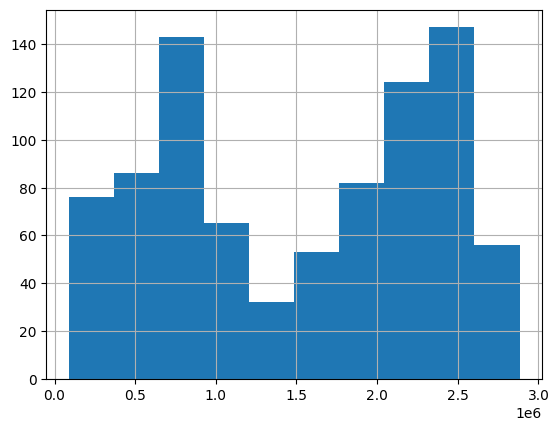

In [5]:
tsa_melted_holiday_travel.travelers.hist()

Note that this is the same as what you see in the scatter matrix, but you can look at subsets of data with the 'by' keyword.

array([[<Axes: title={'center': 'Christmas Day'}>,
        <Axes: title={'center': 'Christmas Eve'}>,
        <Axes: title={'center': 'July 4th'}>],
       [<Axes: title={'center': 'Labor Day'}>,
        <Axes: title={'center': 'Memorial Day'}>,
        <Axes: title={'center': "New Year's Day"}>],
       [<Axes: title={'center': "New Year's Eve"}>,
        <Axes: title={'center': 'Thanksgiving'}>, <Axes: >]], dtype=object)

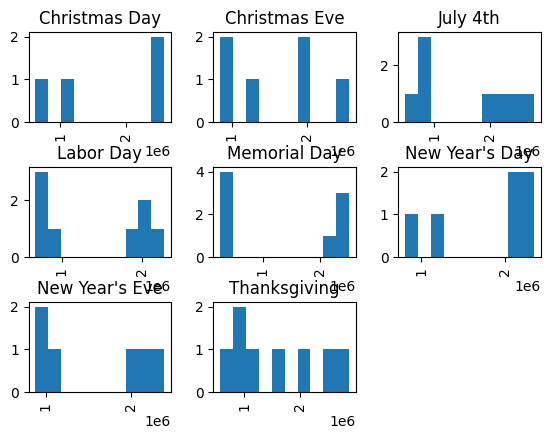

In [7]:
tsa_melted_holiday_travel[["holiday","travelers"]].hist(by="holiday")

Pandas offers other plot types via the `kind` parameter, so we specify `kind='bar'` when calling the `plot()` method. Then, we further format the visualization using the `Axes` object returned by the `plot()` method:

In [ ]:
import calendar
from matplotlib import ticker

ax = plot_data.plot(
    kind='bar', rot=0, xlabel='', ylabel='travelers',
    figsize=(8, 1.5), title='TSA Monthly Traveler Throughput'
)

# use month abbreviations for the ticks on the x-axis
ax.set_xticklabels(calendar.month_abbr[1:])

# show y-axis labels in millions instead of scientific notation
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# customize the legend
ax.legend(title='', loc='center', bbox_to_anchor=(0.5, -0.3), ncols=3, frameon=False)

Some additional things to keep in mind:
- Matplotlib's `ticker` module provides functionality for customizing both the tick labels and locations &ndash; check out the [documentation](https://matplotlib.org/stable/api/ticker_api.html) for more information.
- Pandas supports horizontal and stacked bars as well; [this](https://medium.com/@stefaniemolin/how-to-pivot-and-plot-data-with-pandas-9450939fcf8) blog post shows how to make stacked horizontal bars using a pivot table.
- The `plot()` method takes a lot of [parameters](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html), many of which get passed down to Matplotlib; however, sometimes we need to use Matplotlib calls directly.

### Plotting distributions

Let's now compare the distribution of daily TSA traveler throughput across years. We will create a subplot for each year with both a histogram and a kernel density estimate (KDE) of the distribution.  Pandas has generated the `Figure` and `Axes` objects for both examples so far, but we can build custom layouts by creating them ourselves with Matplotlib using the `plt.subplots()` function. First, we will need to import the `pyplot` module:

In [ ]:

import matplotlib.pyplot as plt

While pandas lets us specify that we want subplots and their layout (with the `subplots` and `layout` parameters, respectively), using Matplotlib to create the subplots directly gives us additional flexibility:

In [ ]:
fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(6, 4))

for year, ax in zip(tsa_melted_holiday_travel.year.unique(), axes):
    plot_data = tsa_melted_holiday_travel.loc[str(year)].travelers
    plot_data.plot(kind='hist', legend=False, density=True, alpha=0.8, ax=ax)
    plot_data.plot(kind='kde', legend=False, color='blue', ax=ax)
    ax.set(title=f'{year} TSA Traveler Throughput', xlabel='travelers')

fig.tight_layout() # handle overlaps

*Tip: If you're new to the `zip()` function, check out [this](https://realpython.com/python-zip-function/) article.*

## Plotting with Seaborn

The Seaborn library provides the means to easily visualize long-format data without first pivoting it. In addition, it also offers some additional plot types &ndash; once again building on top of Mtplotlib. Here, we will look at a few examples of visualizations we can create with Seaborn.

### Visualizing long-format data

With Seaborn, we can specify plot colors according to values of a column with the `hue` parameter. When working with functions that generate subplots, we can also specify how to split the subplots by values of a long-format column with the `col` and `row` parameters. Here, we revisit the comparison of the distribution of TSA traveler throughput across years:

In [ ]:
import seaborn as sns

sns.displot(
    data=tsa_melted_holiday_travel, x='travelers', col='year', kde=True, height=2.5
)

### Heatmaps
We can also use Seaborn to visualize pivot tables as heatmaps:

In [ ]:
data = tsa_melted_holiday_travel['2019':'2021-04']\
    .assign(month=lambda x: x.index.month)\
    .pivot_table(index='month', columns='year', values='travelers', aggfunc='sum')

data

In [ ]:
ax = sns.heatmap(data=data / 1e6, cmap='Blues', annot=True, fmt='.1f')
_ = ax.set_yticklabels(calendar.month_abbr[1:], rotation=0)
_ = ax.set_title('Total TSA Traveler Throughput (in millions)')

*Tip: Reference the Matplotlib documentation for more information on [colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html).*

We're moving on from Seaborn now, but there is a lot more available in the [API](https://seaborn.pydata.org/api.html). Be sure to check out the following at a minimum:
- [pairwise plots](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot) with `pairplot()`
- [categorical scatter plots](https://seaborn.pydata.org/generated/seaborn.swarmplot.html#seaborn.swarmplot) with `swarmplot()`
- [joint distribution plots](https://seaborn.pydata.org/generated/seaborn.jointplot.html#seaborn.jointplot) with `jointplot()`
- [FacetGrids](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid) for custom layouts with any plot type

## Customizing plots with Matplotlib

In this final section, we will discuss how to use Matplotlib to customize plots. Since there is a lot of functionality available, we will only be covering how to add shaded regions and annotations here, but be sure to check out the [documentation](https://matplotlib.org/) for more.

### Adding shaded regions

When looking at a plot of TSA traveler throughput over time, it's helpful to indicate periods during which there was holiday travel. We can do so with the `axvspan()` method:

In [ ]:
plot_data = tsa_melted_holiday_travel['2019-05':'2019-11']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# collect the holiday ranges (start and end dates)
holiday_ranges = plot_data.dropna().reset_index()\
    .groupby('holiday').agg({'date': ['min', 'max']})

# create shaded regions for each holiday in the plot
for start_date, end_date in holiday_ranges.to_numpy():
    ax.axvspan(start_date, end_date, color='gray', alpha=0.2)

*Tip: Use `axhspan()` for horizontally shaded regions and `axvline()` / `axhline()` for vertical/horizontal reference lines.*

### Adding annotations

We can use the `annotate()` method to add annotations to the plot. Here, we point out the day in 2019 with the highest TSA traveler throughput, which was the day after Thanksgiving:

In [ ]:
plot_data = tsa_melted_holiday_travel.loc['2019']
ax = plot_data.travelers.plot(
    title='TSA Traveler Throughput', ylabel='travelers', figsize=(9, 2)
)
ax.yaxis.set_major_formatter(ticker.EngFormatter())

# highest throughput
max_throughput_date = plot_data.travelers.idxmax()
max_throughput = plot_data.travelers.max()
_ = ax.annotate(
    f'{max_throughput_date:%b %d}\n({max_throughput / 1e6:.2f} M)',
    xy=(max_throughput_date, max_throughput),
    xytext=(max_throughput_date - pd.Timedelta(days=25), max_throughput * 0.92),
    arrowprops={'arrowstyle': '->'}, ha='center'
)

Some things to keep in mind:
- We used `Axes` methods to customize our plots (i.e., an object-oriented approach), but the `pyplot` module provides equivalent functions (i.e., a functional approach) for adding shaded regions, reference lines, annotations, etc. &ndash; although the function names might be slightly different than their `Axes` method counterparts (e.g., `Axes.set_xlabel()` vs. `plt.xlabel()`).
- In general, try to stick to either the object-oriented or functional approach rather than mixing the two. However, be careful when working with subplots &ndash; `pyplot` functions will only affect the last subplot.
- The [anatomy of a figure](https://matplotlib.org/stable/gallery/showcase/anatomy.html) diagram in the Matplotlib documentation is a great resource for identifying which objects you will need to access for plot customizations.

# Section 3: More advanced Pandas

## Calculating summary statistics

In the next section of this workshop, we will discuss data cleaning for a more meaningful analysis of our datasets; however, we can already extract some interesting insights from the `meteorites` data by calculating summary statistics.

#### How many of the meteorites were found versus observed falling?

In [ ]:
meteorites.fall.value_counts(normalize=True)

*Tip: Pass in `normalize=True` to see this result as percentages. Check the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html) for additional functionality.*

#### What was the mass of the average meterorite?

In [ ]:
meteorites['mass (g)'].mean()

**Important**: The mean isn't always the best measure of central tendency. If there are outliers in the distribution, the mean will be skewed. Here, the mean is being pulled higher by some very heavy meteorites &ndash; the distribution is [right-skewed](https://www.analyticsvidhya.com/blog/2020/07/what-is-skewness-statistics/).

Taking a look at some quantiles at the extremes of the distribution shows that the mean is between the 95th and 99th percentile of the distribution, so it isn't a good measure of central tendency here:

In [ ]:
meteorites['mass (g)'].quantile([.01,.05,.5,.95,.99])

A better measure in this case is the median (50th percentile), since it is robust to outliers:

In [ ]:
meteorites['mass (g)'].median()

#### What was the mass of the heaviest meteorite?

In [ ]:
meteorites['mass (g)'].max()

Let's extract the information on this meteorite:

In [ ]:
meteorites.loc[meteorites['mass (g)'].idxmax()]

#### How many different types of meteorite classes are represented in this dataset?

In [ ]:
meteorites.recclass.nunique()

Some examples:

In [ ]:
meteorites.recclass.unique()[:14]

*Note: All fields preceded with "rec" are the values recommended by The Meteoritical Society. Check out [this Wikipedia article](https://en.wikipedia.org/wiki/Meteorite_classification) for some information on meteorite classes.*

#### Get some summary statistics on the data itself
We can get common summary statistics for all columns at once. By default, this will only be numeric columns, but here, we will summarize everything together:

In [ ]:
meteorites.describe(include="all")

**Important**: `NaN` values signify missing data. For instance, the `fall` column contains strings, so there is no value for `mean`; likewise, `mass (g)` is numeric, so we don't have entries for the categorical summary statistics (`unique`, `top`, `freq`).

#### Check out the documentation for more descriptive statistics:

- [Series](https://pandas.pydata.org/docs/reference/series.html#computations-descriptive-stats)
- [DataFrame](https://pandas.pydata.org/docs/reference/frame.html#computations-descriptive-stats)

# Section 4: Data Wrangling

To prepare our data for analysis, we need to perform data wrangling. In this section, we will learn how to clean and reformat data (e.g., renaming columns and fixing data type mismatches), restructure/reshape it, and enrich it (e.g., discretizing columns, calculating aggregations, and combining data sources).

## Data cleaning

In this section, we will take a look at creating, renaming, and dropping columns; type conversion; and sorting &ndash; all of which make our analysis easier. We will be working with the 2019 Yellow Taxi Trip Data provided by NYC Open Data.

In [ ]:
taxis = pd.read_csv("./data/2019_Yellow_Taxi_Trip_Data.csv")
taxis

*Source: [NYC Open Data](https://data.cityofnewyork.us/Transportation/2019-Yellow-Taxi-Trip-Data/2upf-qytp) collected via [SODA](https://dev.socrata.com/foundry/data.cityofnewyork.us/2upf-qytp).*

### Dropping columns
Let's start by dropping the ID columns and the `store_and_fwd_flag` column, which we won't be using.

In [ ]:
mask = taxis.columns.str.contains('id$|store_and_fwd_flag',regex=True)
columns_to_drop = taxis.columns[mask]
columns_to_drop

In [ ]:
taxis = taxis.drop(columns=columns_to_drop)
taxis.head()

*Tip: Another way to do this is to select the columns we want to keep: `taxis.loc[:,~mask]`.*

### Renaming columns

Next, let's rename the datetime columns:

In [ ]:
taxis = taxis.rename(
    columns = {'tpep_pickup_datetime':'pickup',
               'tpep_dropoff_datetime':'dropoff'}
)
taxis.columns

### Type conversion

Notice anything off with the data types?

In [ ]:
taxis.dtypes

Both `pickup` and `dropoff` should be stored as datetimes. Let's fix this:

In [ ]:
taxis[['pickup','dropoff']]= taxis[['pickup','dropoff']].apply(pd.to_datetime)

*Tip: There are other ways to perform type conversion. For numeric values, we can use the `pd.to_numeric()` function, and we will see the `astype()` method, which is a more generic method, a little later.*

In [ ]:
taxis

### Creating new columns

Let's calculate the following for each row:

1. elapsed time of the trip
2. the tip percentage
3. the total taxes, tolls, fees, and surcharges
4. the average speed of the taxi

In [ ]:
taxis = taxis.assign(
    elapsed_time = lambda x: x.dropoff - x.pickup,
    cost_before_tip = lambda x: x.total_amount - x.tip_amount,
    tip_pct = lambda x: x.tip_amount / x.cost_before_tip,
    fees = lambda x: x.cost_before_tip - x.fare_amount,
    avg_speed = lambda x: x.trip_distance.div(
        x.elapsed_time.dt.total_seconds() / 60 / 60
    )
)

*Tip: New to `lambda` functions? These small, anonymous functions can receive multiple arguments, but can only contain one expression (the return value). You will see these a lot in pandas code. Read more about them [here](https://realpython.com/python-lambda/).*

Our new columns get added to the right:

In [ ]:
taxis.head(2)

Some things to note:
- We used `lambda` functions to 1) avoid typing `taxis` repeatedly and 2) be able to access the `cost_before_tip` and `elapsed_time` columns in the same method that we create them.
- To create a single new column, we can also use `df['new_col'] = <values>`.

### Sorting by values

We can use the `sort_values()` method to sort based on any number of columns:

In [ ]:
taxis.sort_values(['passenger_count','pickup'],ascending=[False,True]).head()

To pick out the largest/smallest rows, use `nlargest()` / `nsmallest()` instead. Looking at the 3 trips with the longest elapsed time, we see some possible data integrity issues:

In [ ]:
taxis.nlargest(3,'elapsed_time')

## Working with the index

So far, we haven't really worked with the index because it's just been a row number; however, we can change the values we have in the index to access additional features of the pandas library.

### Setting and sorting the index

Currently, we have a RangeIndex, but we can switch to a DatetimeIndex by specifying a datetime column when calling `set_index()`:

In [ ]:
taxis = taxis.set_index('pickup')
taxis.head(3)

Since we have a sample of the full dataset, let's sort the index to order by pickup time:

In [ ]:
taxis = taxis.sort_index()
taxis

*Tip: `taxis.sort_index(axis=1)` will sort the columns by name. The `axis` parameter is present throughout the pandas library: `axis=0` targets rows and `axis=1` targets columns.*

We can now select ranges from our data based on the datetime the same way we did with row numbers:

In [ ]:
taxis['2019-10-23 07:45':'2019-10-23 08']

When not specifying a range, we use `loc[]`:

In [ ]:
taxis.loc['2019-10-23 08']

### Resetting the index

We will be working with time series later this section, but sometimes we want to reset our index to row numbers and restore the columns. We can make `pickup` a column again with the `reset_index()` method:

In [ ]:
taxis = taxis.reset_index()
taxis.head()

## Reshaping data

The taxi dataset we have be working with is in a format conducive to an analysis. This isn't always the case. Let's now take a look at the TSA traveler throughput data, which compares 2021 throughput to the same day in 2020 and 2019:

In [ ]:
tsa = pd.read_csv("./data/tsa_passenger_throughput.csv",parse_dates=["Date"])
tsa.head()

*Source: [TSA.gov](https://www.tsa.gov/coronavirus/passenger-throughput)*

First, we will lowercase the column names and take the first word (e.g., `2021` for `2021 Traveler Throughput`) to make this easier to work with:

In [ ]:
tsa = tsa.rename(columns = lambda x: x.lower().split()[0])
tsa.head()

Now, we can work on reshaping it.

### Melting

Melting helps convert our data into long format. Now, we have all the traveler throughput numbers in a single column:

In [ ]:
tsa_melted = tsa.melt(
    id_vars = "date", #column that uniquely identifies a row
    var_name = "year", # name for the new column created by melting
    value_name = "travelers" #name for new column containing values from melted columns
)
tsa_melted.sample(5,random_state=1)

To convert this into a time series of traveler throughput, we need to replace the year in the `date` column with the one in the `year` column. Otherwise, we are marking prior years' numbers with the wrong year.

In [ ]:
tsa_melted = tsa_melted.assign(
    date = lambda x: pd.to_datetime(x.year + x.date.dt.strftime('-%m-%d'))
)
tsa_melted.sample(5,random_state=1)

This leaves us with some null values (the dates that aren't present in the dataset):

In [ ]:
tsa_melted.sort_values('date').tail(3)

These can be dropped with the `dropna()` method:

In [ ]:
tsa_melted = tsa_melted.dropna()
tsa_melted.sort_values("date").tail(3)

### Pivoting

Using the melted data, we can pivot the data to compare TSA traveler throughput on specific days across years:

In [ ]:
tsa_pivoted = tsa_melted\
  .query('date.dt.month == 3 and date.dt.day < 10')\
  .assign(day_in_march=lambda x: x.date.dt.day)\
  .pivot(index="year",columns = "day_in_march",values="travelers")

tsa_pivoted

In [ ]:
tsa_pivoted.reset_index()

**Important**: We aren't covering the `unstack()` and `stack()` methods, which are additional ways to pivot and melt, respectively. These come in handy when we have a multi-level index (e.g., if we ran `set_index()` with more than one column). More information can be found [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html).

### Transposing

The `T` attribute provides a quick way to flip rows and columns.

In [ ]:
tsa_pivoted.T

### Merging

We typically observe changes in air travel around the holidays, so adding information about the dates in the TSA dataset provides more context. The `holidays.csv` file contains a few major holidays in the United States:

In [ ]:
holidays = pd.read_csv("./data/holidays.csv",parse_dates = True, index_col = "date")
holidays.loc['2019']

Merging the holidays with the TSA traveler throughput data will provide more context for our analysis:

In [ ]:
tsa_melted_holidays = tsa_melted\
  .merge(holidays,left_on="date",right_index = True,how="left")\
  .sort_values('date')

tsa_melted_holidays.head()

*Tip: There are many parameters for this method, so be sure to check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html). To append rows, take a look at the `pd.concat()` function.*

We can take this a step further by marking a few days before and after each holiday as part of the holiday. This would make it easier to compare holiday travel across years and look for any uptick in travel around the holidays:

In [ ]:
tsa_melted_holiday_travel = tsa_melted_holidays.assign(
    holiday = lambda x:
      x.holiday\
        .fillna(method="ffill",limit=1)\
        .fillna(method="bfill", limit = 2)
)

In [ ]:
tsa_melted_holiday_travel

*Tip: Check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html) for the full list of functionality available with the `fillna()` method.*

Notice that we now have values for the day after each holiday and the two days prior. Thanksgiving in 2019 was on November 28th, so the 26th, 27th, and 29th were filled. Since we are only replacing null values, we don't override Christmas Day with the forward fill of Christmas Eve:

In [ ]:
#tsa_melted_holiday_travel.query(
#    'year == "2019" and '
#    '(holiday== "Thanksgiving" or holiday.str.contains("Christmas"))'
#)

tsa_melted_holiday_travel[(tsa_melted_holiday_travel.year=="2019") &
                          (tsa_melted_holiday_travel.holiday.isin(["Christmas Eve","Thanksgiving"]))]

## Aggregations and grouping

After reshaping and cleaning our data, we can perform aggregations to summarize it in a variety of ways. In this section, we will explore using pivot tables, crosstabs, and group by operations to aggregate the data.

### Pivot tables
We can build a pivot table to compare holiday travel across the years in our dataset:

In [ ]:
tsa_melted_holiday_travel.pivot_table(
    index='year',columns='holiday',
    values='travelers',aggfunc='sum')

We can use the `pct_change()` method on this result to see which holiday travel periods saw the biggest change in travel:

In [ ]:
tsa_melted_holiday_travel.pivot_table(
    index='year',columns='holiday',
    values='travelers',aggfunc='sum').pct_change()

Let's make one last pivot table with column and row subtotals, along with some formatting improvements. First, we set a display option for all floats:

In [ ]:
pd.set_option("display.float_format",'{:,.0f}'.format)

Next, we group together Christmas Eve and Christmas Day, likewise for New Year's Eve and New Year's Day, and create the pivot table:

In [ ]:
import numpy as np

tsa_melted_holiday_travel.assign(
    holiday = lambda x: np.where(
       x.holiday.str.contains("Christmas|New Year",regex=True),
       x.holiday.str.replace('Day|Eve','',regex=True).str.strip(),
       x.holiday
    )
).pivot_table(
    index='year',columns='holiday',
    values='travelers',aggfunc='sum',
    margins=True,margins_name="Total"
)

Before moving on, let's reset the display option:

In [ ]:
pd.reset_option('display.float_format')

*Tip: Read more about options in the documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html).*

### Crosstabs
The `pd.crosstab()` function provides an easy way to create a frequency table. Here, we count the number of low-, medium-, and high-volume travel days per year, using the `pd.cut()` function to create three travel volume bins of equal width:

In [ ]:
pd.crosstab(
    index = pd.cut(tsa_melted_holiday_travel.travelers,
                   bins=3, labels=['low','medium','high']
                   ),
    columns = tsa_melted_holiday_travel.year,
    rownames = ['travel_volume']
)

*Tip: The `pd.cut()` function can also be used to specify custom bin ranges. For equal-sized bins based on quantiles, use the `pd.qcut()` function instead.*

Note that the `pd.crosstab()` function supports other aggregations provided you pass in the data to aggregate as `values` and specify the aggregation with `aggfunc`. You can also add subtotals and normalize the data. See the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) for more information.

### Group by operations
Rather than perform aggregations, like `mean()` or `describe()`, on the full dataset at once, we can perform these calculations per group by first calling `groupby()`:

In [ ]:
import numpy as np
tsa_melted_holiday_travel.groupby("year").describe(include=np.number)

Groups can also be used to perform separate calculations per subset of the data. For example, we can find the highest-volume travel day per year using `rank()`:

In [ ]:
tsa_melted_holiday_travel.assign(
    travel_volume_rank = lambda x: x.groupby("year").travelers.rank(ascending=False)
).sort_values(['travel_volume_rank',"year"]).head(3)


The previous two examples called a single method on the grouped data, but using the `agg()` method we can specify any number of them:

In [ ]:
tsa_melted_holiday_travel.assign(
    holiday_travelers = lambda x:np.where(~x.holiday.isna(),x.travelers, np.nan),
    non_holiday_travelers = lambda x: np.where(x.holiday.isna(),x.travelers,np.nan),
    year = lambda x: pd.to_numeric(x.year)
).select_dtypes(include="number").groupby("year").agg(['mean','std'])

*Tip: The `select_dtypes()` method makes it possible to select columns by their data type. We can specify the data types to `exclude` and/or `include`.*

In addition, we can specify which aggregations to perform on each column:

In [ ]:
tsa_melted_holiday_travel.assign(
    holiday_travelers = lambda x:np.where(~x.holiday.isna(),x.travelers, np.nan),
    non_holiday_travelers = lambda x: np.where(x.holiday.isna(),x.travelers,np.nan),
    year = lambda x: pd.to_numeric(x.year)
).groupby("year").agg({
    'holiday_travelers':['mean','std'],
    'holiday':['nunique','count']
})

We are only scratching the surface; some additional functionalities to be aware of include the following:
- We can group by multiple columns &ndash; this creates a hierarchical index.
- Groups can be excluded from calculations with the `filter()` method.
- We can group on content in the index using the `level` or `name` parameters e.g., `groupby(level=0)` or `groupby(name='year')`.
- We can group by date ranges if we use a `pd.Grouper()` object.

Be sure to check out the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) for more details.

## Time series

When working with time series data, pandas provides us with additional functionality to not just compare the observations in our dataset, but to use their relationship in time to analyze the data. In this section, we will see a few such operations for selecting date/time ranges, calculating changes over time, performing window calculations, and resampling the data to different date/time intervals.

### Selecting based on date and time

Let's switch back to the `taxis` dataset, which has timestamps of pickups and dropoffs. First, we will set the `dropoff` column as the index and sort the data:

In [ ]:
taxis = taxis.set_index("dropoff").sort_index()

We saw earlier that we can slice on the datetimes:

In [ ]:
taxis['2019-10-24 12':'2019-10-24 13']

We can also represent this range with shorthand. Note that we must use `loc[]` here:

In [ ]:
taxis.loc['2019-10-24 12']

However, if we want to look at this time range across days, we need another strategy.

We can pull out the dropoffs that happened between a certain time range on *any* day with the `between_time()` method:

In [ ]:
taxis.between_time('12:00','13:00')

*Tip: The `at_time()` method can be used to extract all entries at a given time (e.g., 12:35:27).*

Finally, `head()` and `tail()` limit us to a number of rows, but we may be interested in rows within the first/last 2 hours (or any other time interval) of the data, in which case, we should use `first()` / `last()`:

In [ ]:
taxis.first('2H')

*Tip: Available date/time offsets can be found in the pandas documentation [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects).*

For the rest of this section, we will be working with the TSA traveler throughput data. Let's start by setting the index to the `date` column:

In [ ]:
tsa_melted_holiday_travel = tsa_melted_holiday_travel.set_index("date")

### Calculating change over time

In [ ]:
tsa_melted_holiday_travel.loc['2020'].assign(
    one_day_change = lambda x: x.travelers.diff(),
    seven_day_change=lambda x: x.travelers.diff(7)
).head(10)

*Tip: To perform operations other than subtraction, take a look at the `shift()` method. It also makes it possible to perform operations across columns.*

### Resampling
We can use resampling to aggregate time series data to a new frequency:

In [ ]:
tsa_melted_holiday_travel['2019':'2021-Q1'].select_dtypes(include="number")\
  .resample("Q").agg(['sum','mean','std'])


### Window calculations

Window calculations are similar to group by calculations except the group over which the calculation is performed isn't static &ndash; it can move or expand. Pandas provides functionality for constructing a variety of windows, including moving/rolling windows, expanding windows (e.g., cumulative sum or mean up to the current date in a time series), and exponentially weighted moving windows (to weight closer observations more than further ones). We will only look at rolling and expanding calculations here.

Performing a window calculation is very similar to a group by calculation &ndash; we first define the window, and then we specify the aggregation:

In [ ]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA':lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
    }
).head()

To understand what's happening, it's best to visualize the original data and the result, so here's a sneak peek of plotting with pandas. First, some setup to embed SVG plots in the notebook:

In [ ]:
import matplotlib_inline
# from utils import mpl_svg_config

# matplotlib_inline.backend_inline.set_matplotlib_formats(
#     'svg' # output images using SVG format
# )

Now, we call the `plot()` method to visualize the data:

In [ ]:
tsa_melted_holiday_travel.loc['2020'].assign(
    **{
        '7D MA':lambda x: x.rolling('7D').travelers.mean(),
        'YTD mean': lambda x: x.expanding().travelers.mean()
    }
).plot(title='2020 TSA Traveler Throughput',ylabel="travelers",alpha=0.8)

Other types of windows:
- [exponentially weighted moving](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html): use the `ewm()` method
- [custom](https://pandas.pydata.org/docs/user_guide/window.html#window-custom-rolling-window): create a subclass of `pandas.api.indexers.BaseIndexer` or use a pre-built one in `pandas.api.indexers`